# Credit Risk Analysis Prediction

Let's work with the 'Credit Risk Dataset' from Kaggle. In this project, we will analyze and preprocess the data from numerous individuals and construct machine learning models to determine whether loans will be granted or not. We will test the 'Neural Network', 'Gradient Boosting', 'Random Forest', 'XGBoost', 'SVM', 'KNN', 'Logistic Regression', and 'Naive Bayes' models.

Dataset Link: https://www.kaggle.com/datasets/laotse/credit-risk-dataset

# Summary

### Chapter 1: Exploratory Analysis
- 1.1: Importing Data and First Look
- 1.2: Checking Null Values
- 1.3: Checking Data Types
- 1.4: Final Data Analysis
- 1.5: Plotting Graphs

### Chapter 2: Data Processing
- 2.1: Missing Values
- 2.2: Handling Outliers
- 2.3: Handling Incorrect Data Types
- 2.4: One Hot Encoding
- 2.5: Standardization

### Chapter 3: Building and Testing Machine Learning Models
- 3.1: Splitting Data into Training and Testing Sets
- 3.2: Logistic Regression
- 3.3: Random Forest
- 3.4: Gradient Boosting
- 3.5: XGBoost
- 3.6: Support Vector Machine (SVM)
- 3.7: K-Nearest Neighbors (KNN)
- 3.8: Naive Bayes
- 3.9: Neural Network

### Chapter 4: Conclusions
- 4.1: Final Conclusions of Our Project


# Chapter 1 - Exploratory and Statistical Analysis

In this section, we take a close look at our data to understand what it can tell us. We start by summarizing the main features of the data and then use graphs and charts to visualize it in a way that's easy to understand. By doing this, we hope to find any interesting patterns or trends that can guide us in our further analysis. This step is crucial for getting to know our data better before we dive into more advanced techniques.

In [1]:
# Let's start by importing the initial libraries needed to carry out our project.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Eliminate the warnings. 
import warnings
warnings.filterwarnings("ignore")

- Feature Name:	                    Description
- person_age:	                    Age
- person_income:	                Annual Income
- person_home_ownership:	        Home ownership
- person_emp_length:	            Employment length (in years)
- loan_intent:	                    Loan intent
- loan_grade:	                    Loan grade
- loan_amnt:	                    Loan amount
- loan_int_rate:	                Interest rate
- loan_status:	                    Loan status (0 is non default 1 is default)
- loan_percent_income:	            Percent income
- cb_person_default_on_file:	    Historical default
- cb_preson_cred_hist_length:	    Credit history length

"loan_status" is our target class.

loan_status 0 = loan denied.

loan_status 1 = loan approved.

### 1.1: Importing Data and First Look

Let's start by importing our data from a '.csv' file using the Pandas library, so we can view our data and perform an initial analysis on it.

In [2]:
# We will start by using the 'Pandas' library to read the 'credit_risk_dataset.csv' file.
credit_df = pd.read_csv("credit_risk_dataset.csv", index_col=0)

# Let's view the first 5 and last 5 rows of the dataframe to check the data.
credit_df

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28


In [3]:
# Here, we'll use the 'describe()' method to check some descriptive statistics about the numeric columns of the dataframe 'credit_df'.
credit_df.describe() 

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### 1.2: Checking Null Values

We will use the 'isnull' and 'sum' methods to sum up the null values in each column.

In [4]:
credit_df.isnull().sum()

person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

"person_emp_length" and "loan_int_rate" are the columns that has null values in our dataset. 

### 1.3: Checking Data Types

 We'll use the 'dtypes' attribute of the dataframe 'credit_df' to check the data types of each column.

In [5]:
credit_df.dtypes

person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

Check if the unique datas are correct in the 'cb_person_default_on_file' column.

In [6]:
credit_df['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

The 'cb_person_default_on_file' column has only two types of entries: 'Y' for 'Yes' and 'N' for 'No'. 

Let's transform it further into the 'Boolean' format to better suit machine learning models.

### 1.4: Final Data Analysis.

In [7]:
# Verificar os valores únicos em person_home_ownership.
credit_df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [8]:
# Checking the unique values in loan_intent.
credit_df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [9]:
# Checking the unique values in loan_grade.
credit_df['loan_grade'].unique()

array(['D', 'B', 'C', 'A', 'E', 'F', 'G'], dtype=object)

### 1.5: Plotting Graphs

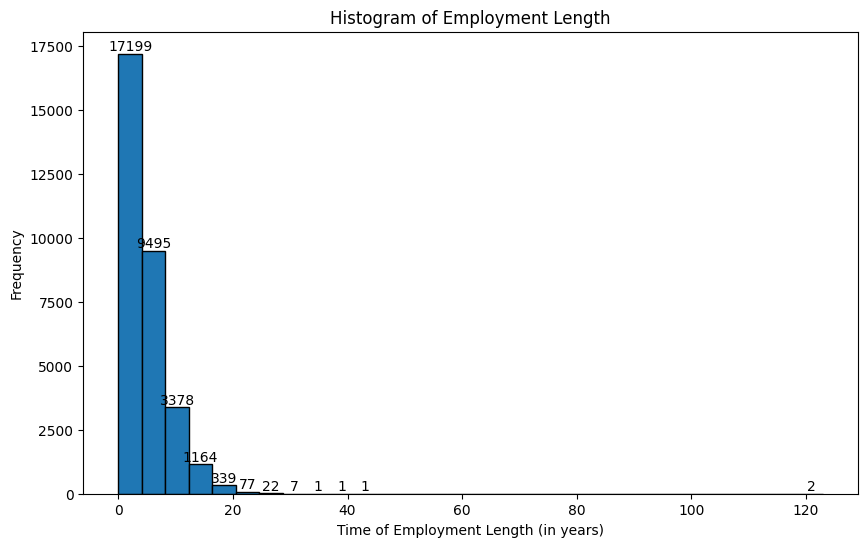

In [10]:
# We will use the matplotlib library to check the data distribution in the 'person_emp_length' column.

# let's create the histogram.
plt.figure(figsize=(10, 6))
n, bins, _ = plt.hist(credit_df['person_emp_length'].dropna(), bins=30, edgecolor='black')

# Add the specific numbers over the bars.
for count, value in zip(n, bins[:-1]):
    if count > 0:
        plt.text(value + (bins[1] - bins[0]) / 2, count, str(int(count)), ha='center', va='bottom')

# Set the title and the axis labels.
plt.title('Histogram of Employment Length')
plt.xlabel('Time of Employment Length (in years)')
plt.ylabel('Frequency')

# show the histogram.
plt.show()

An outlier was detected above 120 and we will handle it in the next step.

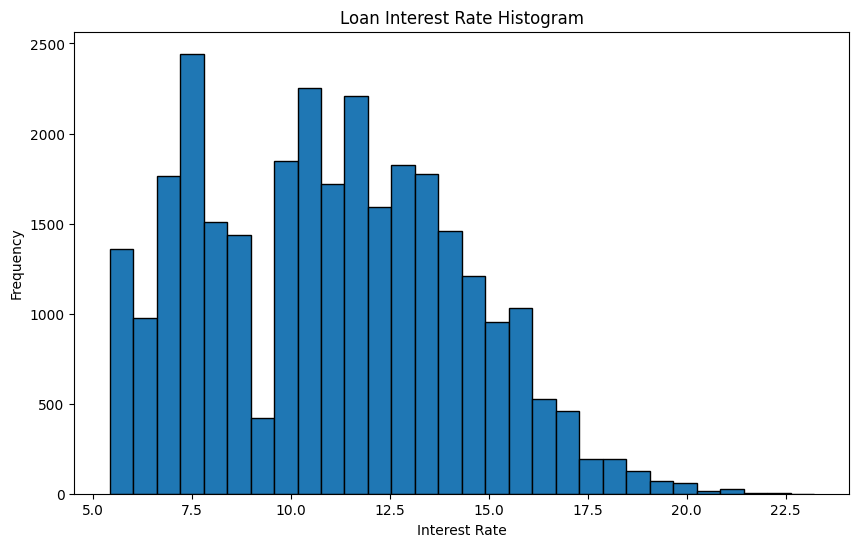

In [11]:
# Create a histogram to check the data distribution of the 'loan_int_rate' column.
plt.figure(figsize=(10, 6))
plt.hist(credit_df['loan_int_rate'], bins=30, edgecolor='black')
plt.title('Loan Interest Rate Histogram')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

# Chapter 2: Data Processing

In this section, we roll up our sleeves and prepare our data for analysis. We clean, transform, and reshape the raw data into a format that's suitable for our needs. This involves handling missing values, removing duplicates, and standardizing formats. Our goal in this phase is to ensure that our data is reliable and consistent, setting a solid foundation for our future ML models. By processing the data effectively, we can maximize the accuracy and relevance of our insights, empowering us to make informed decisions based on trustworthy information.

### 2.1: Missing Values 

First of all, we'll handle the null values that we've found in our dataframe on the previous step. 

In [12]:
# Create a function to replace null values with the mean value of a specific column.
def replace_nan_with_median(dataframe, column_name):
    median_value = dataframe[column_name].median()
    dataframe[column_name].fillna(median_value, inplace=True)

In [13]:
# Using the function to replace null values in 'person_emp_length'.
replace_nan_with_median(credit_df, 'person_emp_length')
 
# Check if the replacements were successful:
credit_df.isnull().sum()

person_income                    0
person_home_ownership            0
person_emp_length                0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [14]:
# Using the function to replace blank values in 'loan_int_rate'.
replace_nan_with_median(credit_df, 'loan_int_rate')

# Check if there are still blank values:
credit_df.isnull().sum()

person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 2.2: Handling Outliers

Since it's impossible for a human to be employed for over 120 years, we've decided to remove the outlier that we've found in the previous step.

In [15]:
def remove_values_above_max(dataframe, column_name, max_value):
    dataframe.drop(dataframe[dataframe[column_name] > max_value].index, inplace=True)

In [16]:
# Using the function to replace values greater than 120 in 'person_emp_length'.
remove_values_above_max(credit_df, 'person_emp_length', 120)

# Check if the values were removed correctly
# Here we'll verify the maximum value of this column.
credit_df['person_emp_length'].max()

41.0

### 2.3: Handling Incorrect Data Types

Now we will handle the incorrect data types in our dataframe.

In [17]:
def transform_values(dataframe, column_name, value_mapping):
    dataframe[column_name] = dataframe[column_name].map(value_mapping)

In [18]:
# Using the function to transform 'Y' into True and 'N' into False in 'cb_person_default_on_file'.
transform_values(credit_df, 'cb_person_default_on_file', {'Y': True, 'N': False})

# Checking if the transformation was applied correctly.
credit_df['cb_person_default_on_file'].unique()

array([False,  True])

The code evaluates whether each value of the column is equal to 'Y'. The result will be True or False.

In [19]:
# Once again, let's check how the first few rows of the dataframe look after the changes.
credit_df.head()

,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,,,,,,,,,,,
25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,False,3
23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,False,2
24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,True,4
26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,False,3
24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,False,4


In [20]:
# We will check if the data type in 'cb_person_default_on_file' has changed to boolean.
credit_df.dtypes

person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file        bool
cb_person_cred_hist_length      int64
dtype: object

### 2.4: One Hot Encoding 

Applying One Hot Encoding to columns of type 'object'.

In [21]:
# Selecting categorical columns to apply one-hot encoding.
columns_to_encode = ['person_home_ownership', 'loan_intent', 'loan_grade']

# Apply one-hot encoding
credit_df = pd.get_dummies(credit_df, columns=columns_to_encode)
credit_df.head()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,,,,,,,,,,,,,,,,,,,,,
25,9600,1.0,5500,12.87,1,0.57,False,3,True,False,...,True,False,False,False,False,True,False,False,False,False
23,65500,4.0,35000,15.23,1,0.53,False,2,False,False,...,True,False,False,False,False,True,False,False,False,False
24,54400,8.0,35000,14.27,1,0.55,True,4,False,False,...,True,False,False,False,False,True,False,False,False,False
26,77100,8.0,35000,12.42,1,0.45,False,3,False,False,...,False,False,False,False,True,False,False,False,False,False
24,78956,5.0,35000,11.11,1,0.44,False,4,False,False,...,True,False,False,False,True,False,False,False,False,False


In [22]:
# Display the first few rows of the DataFrame with the encoded columns.
credit_df.head()

,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,,,,,,,,,,,,,,,,,,,,,
25,9600,1.0,5500,12.87,1,0.57,False,3,True,False,...,True,False,False,False,False,True,False,False,False,False
23,65500,4.0,35000,15.23,1,0.53,False,2,False,False,...,True,False,False,False,False,True,False,False,False,False
24,54400,8.0,35000,14.27,1,0.55,True,4,False,False,...,True,False,False,False,False,True,False,False,False,False
26,77100,8.0,35000,12.42,1,0.45,False,3,False,False,...,False,False,False,False,True,False,False,False,False,False
24,78956,5.0,35000,11.11,1,0.44,False,4,False,False,...,True,False,False,False,True,False,False,False,False,False


In [23]:
# We'll check how the columns look after applying One Hot Encoding.
# Notice how the number of columns has changed.
credit_df.columns

Index(['person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate',
       'loan_status', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G'],
      dtype='object')

In [24]:
# Let's check the data types of the columns.
# Notice that all the new columns are booleans.
credit_df.dtypes

person_income                       int64
person_emp_length                 float64
loan_amnt                           int64
loan_int_rate                     float64
loan_status                         int64
loan_percent_income               float64
cb_person_default_on_file            bool
cb_person_cred_hist_length          int64
person_home_ownership_MORTGAGE       bool
person_home_ownership_OTHER          bool
person_home_ownership_OWN            bool
person_home_ownership_RENT           bool
loan_intent_DEBTCONSOLIDATION        bool
loan_intent_EDUCATION                bool
loan_intent_HOMEIMPROVEMENT          bool
loan_intent_MEDICAL                  bool
loan_intent_PERSONAL                 bool
loan_intent_VENTURE                  bool
loan_grade_A                         bool
loan_grade_B                         bool
loan_grade_C                         bool
loan_grade_D                         bool
loan_grade_E                         bool
loan_grade_F                      

### 2.5: Standardization

We will now apply a standardization process to the data to better work with it in Machine Learning models.

- Standardization refers to the process of adjusting the scale of the data so that they have a mean of zero and a standard deviation of 1. The StandardScaler performs this normalization by subtracting the mean of each feature and then dividing by the standard deviation. This helps ensure that the data have a more uniform distribution and can improve the performance of many machine learning algorithms.

In [25]:
from sklearn.preprocessing import StandardScaler

# Select only the numeric columns for standardization.
numeric_columns = credit_df.select_dtypes(include=['float64', 'int64']).columns

# Delete the column 'loan_status' from the numeric_columns
numeric_columns = numeric_columns.drop('loan_status')

# Create a copy of the dataframe to avoid change the original one
credit_df_scaled = credit_df.copy()

# Initialize the StandardScaler.
scaler = StandardScaler()

# Apply standardization only to the numeric columns.
credit_df_scaled[numeric_columns] = scaler.fit_transform(credit_df[numeric_columns])

# Show the first 'credit_df_scaled' lines.
credit_df_scaled.head()


,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
person_age,,,,,,,,,,,,,,,,,,,,,
25,-0.899012,-0.951127,-0.667268,0.600695,1,3.808117,False,-0.786389,True,False,...,True,False,False,False,False,True,False,False,False,False
23,-0.050568,-0.233549,3.921085,1.364416,1,3.429622,False,-1.024891,False,False,...,True,False,False,False,False,True,False,False,False,False
24,-0.219042,0.723222,3.921085,1.053750,1,3.618870,True,-0.547887,False,False,...,True,False,False,False,False,True,False,False,False,False
26,0.125496,0.723222,3.921085,0.455070,1,2.672633,False,-0.786389,False,False,...,False,False,False,False,True,False,False,False,False,False
24,0.153666,0.005643,3.921085,0.031140,1,2.578009,False,-0.547887,False,False,...,True,False,False,False,True,False,False,False,False,False


# Chapter 3: Building and Testing Machine Learning Models

Let's proceed with the construction of our Machine Learning models.

We will also perform some 'GridSearch' to find the best parameters for certain algorithms.

After that, we will test our algorithms to observe their performance.

### 3.1: Splitting Data into Training and Testing Sets

In [26]:
from sklearn.model_selection import train_test_split

# Separate the target variable from the others.
X = credit_df_scaled.drop('loan_status', axis=1)  # Features (independent variables)
y = credit_df_scaled['loan_status']  # Target variable (labels)

# Split the datasets into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Display the dimensions of the datasets.
print(f'Dimensions of the training set: X_train - {X_train.shape}, y_train - {y_train.shape}')
print(f'Dimensions of the test set: X_test - {X_test.shape}, y_test - {y_test.shape}')

Dimensions of the training set: X_train - (22175, 24), y_train - (22175,)
Dimensions of the test set: X_test - (5544, 24), y_test - (5544,)


### 3.2: Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model.
model = LogisticRegression(max_iter=150, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred = model.predict(X_test)

# Evaluate the model performance.
accuracy_ln = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display performance metrics.
print(f'Logistic Regression Accuracy: {accuracy_ln:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Logistic Regression Accuracy: 0.8635
Confusion Matrix:
[[4174  216]
 [ 541  613]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4390
           1       0.74      0.53      0.62      1154

    accuracy                           0.86      5544
   macro avg       0.81      0.74      0.77      5544
weighted avg       0.85      0.86      0.85      5544



### 3.3: Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model.
rf_model = RandomForestClassifier(random_state=42)

# Traim the model.
rf_model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model performance.
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Display performance metrics.
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')
print(f'Random Forest Confusion Matrix:\n{conf_matrix_rf}')
print(f'Random Forest Classification Report:\n{classification_rep_rf}')


Random Forest Accuracy: 0.9324
Random Forest Confusion Matrix:
[[4361   29]
 [ 346  808]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4390
           1       0.97      0.70      0.81      1154

    accuracy                           0.93      5544
   macro avg       0.95      0.85      0.89      5544
weighted avg       0.93      0.93      0.93      5544



### 3.4: Gradient Boosting

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model.
gb_model = GradientBoostingClassifier(learning_rate=0.1, max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=150, subsample=0.9, random_state=42)

# Train the model.
gb_model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model performance.
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Display performance metrics.
print(f'Gradient Boosting Accuracy: {accuracy_gb:.4f}')
print(f'Gradient Boosting Confusion Matrix:\n{conf_matrix_gb}')
print(f'Gradient Boosting Classification Report:\n{classification_rep_gb}')


Gradient Boosting Accuracy: 0.9325
Gradient Boosting Confusion Matrix:
[[4349   41]
 [ 333  821]]
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4390
           1       0.95      0.71      0.81      1154

    accuracy                           0.93      5544
   macro avg       0.94      0.85      0.89      5544
weighted avg       0.93      0.93      0.93      5544



GridSearch was performed to find the best parameters. The code is commented below.

In [31]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# # Definir os parâmetros a serem ajustados
# param_grid_gb = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0]
# }

# # Inicializar o modelo Gradient Boosting
# gb_model = GradientBoostingClassifier(random_state=42)

# # Criar o objeto GridSearchCV
# grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)

# # Executar a busca em grade nos dados de treino
# grid_search_gb.fit(X_train, y_train)

# # Melhores parâmetros encontrados
# best_params_gb = grid_search_gb.best_params_

# # Treinar o modelo com os melhores parâmetros
# best_model_gb = grid_search_gb.best_estimator_
# best_model_gb.fit(X_train, y_train)

# # Fazer previsões no conjunto de teste
# y_pred_gb = best_model_gb.predict(X_test)

# # Avaliar o desempenho do modelo
# accuracy_gb = accuracy_score(y_test, y_pred_gb)
# conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
# classification_rep_gb = classification_report(y_test, y_pred_gb)

# # Exibir métricas de desempenho e melhores parâmetros
# print(f'Melhores Parâmetros Gradient Boosting: {best_params_gb}')
# print(f'Acurácia Gradient Boosting: {accuracy_gb:.4f}')
# print(f'Matriz de Confusão Gradient Boosting:\n{conf_matrix_gb}')
# print(f'Relatório de Classificação Gradient Boosting:\n{classification_rep_gb}')
# # Sem gridsearch o resultado tinha sido de 0.9265, logo não melhorou muito.

### 3.5: XGBoost 

In [32]:
import xgboost as xgb

# Initialize the XGBoost model.
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model.
xgb_model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model performance.
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
classification_rep_xgb = classification_report(y_test, y_pred_xgb)

# Display performance metrics.
print(f'XGBoost Accuracy: {accuracy_xgb:.4f}')
print(f'XGBoost Confusion Matrix:\n{conf_matrix_xgb}')
print(f'XGBoost Classification Report:\n{classification_rep_xgb}')

XGBoost Accuracy: 0.9309
XGBoost Confusion Matrix:
[[4340   50]
 [ 333  821]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4390
           1       0.94      0.71      0.81      1154

    accuracy                           0.93      5544
   macro avg       0.94      0.85      0.88      5544
weighted avg       0.93      0.93      0.93      5544



### 3.6: Support Vector Machine (SVM)

In [33]:
from sklearn.svm import SVC

# Initialize the SVM model.
svm_model = SVC(random_state=42)

# Train the model.
svm_model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model performance.
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
classification_rep_svm = classification_report(y_test, y_pred_svm)

# Display performance metrics.
print(f'SVM Accuracy: {accuracy_svm:.4f}')
print(f'SVM Confusion Matrix:\n{conf_matrix_svm}')
print(f'SVM Classification Report:\n{classification_rep_svm}')

SVM Accuracy: 0.9123
SVM Confusion Matrix:
[[4327   63]
 [ 423  731]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4390
           1       0.92      0.63      0.75      1154

    accuracy                           0.91      5544
   macro avg       0.92      0.81      0.85      5544
weighted avg       0.91      0.91      0.91      5544



### 3.7: K-Nearest Neighbors (KNN)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model.
knn_model = KNeighborsClassifier(metric= 'manhattan', n_neighbors=9, weights='distance')

# Train the model.
knn_model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model performance.
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

# Display performance metrics.
print(f'KNN Accuracy: {accuracy_knn:.4f}')
print(f'KNN Confusion Matrix:\n{conf_matrix_knn}')
print(f'KNN Classification Report:\n{classification_rep_knn}')

KNN Accuracy: 0.9037
KNN Confusion Matrix:
[[4307   83]
 [ 451  703]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      4390
           1       0.89      0.61      0.72      1154

    accuracy                           0.90      5544
   macro avg       0.90      0.80      0.83      5544
weighted avg       0.90      0.90      0.90      5544



GridSearch was performed to find the best parameters. The code is commented below.

In [35]:
# from sklearn.model_selection import GridSearchCV

# # Definir os parâmetros que você deseja testar
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],  # testar diferentes valores para o número de vizinhos
#     'weights': ['uniform', 'distance'],  # testar diferentes métodos de ponderação
#     'metric': ['euclidean', 'manhattan']  # testar diferentes métricas de distância
# }

# # Inicializar o modelo KNN
# knn_model = KNeighborsClassifier()

# # Inicializar a busca em grade
# grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring='accuracy', cv=5)

# # Executar a busca em grade no conjunto de treinamento
# grid_search.fit(X_train, y_train)

# # Obter os melhores parâmetros encontrados
# best_params = grid_search.best_params_

# # Treinar o modelo com os melhores parâmetros no conjunto de treinamento completo
# best_knn_model = KNeighborsClassifier(**best_params)
# best_knn_model.fit(X_train, y_train)

# # Fazer previsões no conjunto de teste usando o modelo otimizado
# y_pred_best_knn = best_knn_model.predict(X_test)

# # Avaliar o desempenho do modelo otimizado
# accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
# conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)
# classification_rep_best_knn = classification_report(y_test, y_pred_best_knn)

# # Exibir métricas de desempenho do modelo otimizado
# print(f'Melhores parâmetros encontrados: {best_params}')
# print(f'Acurácia KNN otimizado: {accuracy_best_knn:.4f}')
# print(f'Matriz de Confusão KNN otimizado:\n{conf_matrix_best_knn}')
# print(f'Relatório de Classificação KNN otimizado:\n{classification_rep_best_knn}')

### 3.8 Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes model.
nb_model = GaussianNB()

# Train the model.
nb_model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model performance.
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
classification_rep_nb = classification_report(y_test, y_pred_nb)

# Display performance metrics.
print(f'Naive Bayes Accuracy: {accuracy_nb:.4f}')
print(f'Naive Bayes Confusion Matrix:\n{conf_matrix_nb}')
print(f'Naive Bayes Classification Report:\n{classification_rep_nb}')

Naive Bayes Accuracy: 0.8382
Naive Bayes Confusion Matrix:
[[4126  264]
 [ 633  521]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      4390
           1       0.66      0.45      0.54      1154

    accuracy                           0.84      5544
   macro avg       0.77      0.70      0.72      5544
weighted avg       0.82      0.84      0.83      5544



### 3.9: Neural Network

In [37]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Neural Network model.
mlp_model = MLPClassifier(max_iter=500, random_state=42)

# Train the model.
mlp_model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred_mlp = mlp_model.predict(X_test)

# Evaluate the model performance.
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
classification_rep_mlp = classification_report(y_test, y_pred_mlp)

# Display performance metrics.
print(f'Neural Network Accuracy: {accuracy_mlp:.4f}')
print(f'Neural Network Confusion Matrix:\n{conf_matrix_mlp}')
print(f'Neural Network Classification Report:\n{classification_rep_mlp}')


Neural Network Accuracy: 0.9244
Neural Network Confusion Matrix:
[[4328   62]
 [ 357  797]]
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4390
           1       0.93      0.69      0.79      1154

    accuracy                           0.92      5544
   macro avg       0.93      0.84      0.87      5544
weighted avg       0.92      0.92      0.92      5544



# Chapter 4: Conclusion

### We have reached the end of our project. Let's now take a look at our final conclusions!

The following graph provides a visual comparison of the models' performances, allowing for a quick identification of which had the best precision.

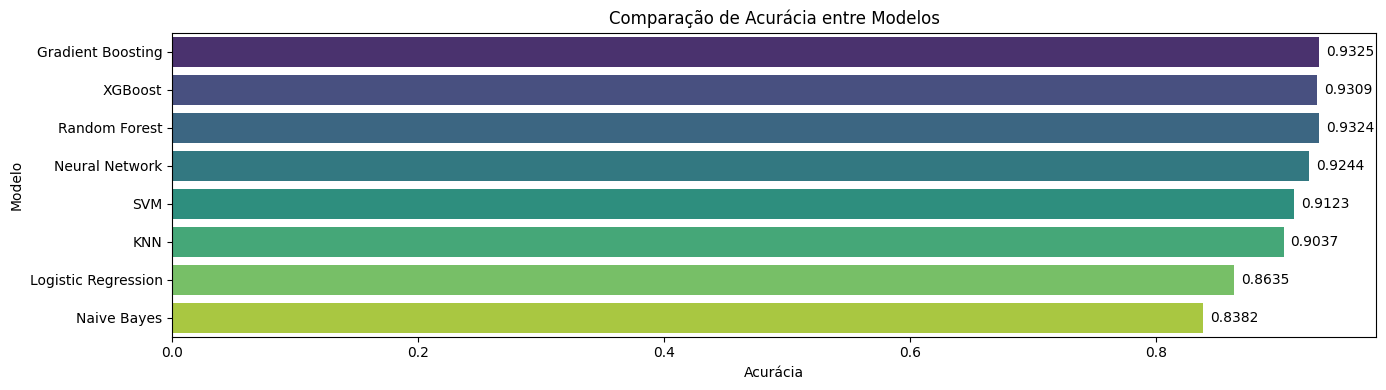

In [38]:
# Defining accuracies in the desired order.
model_order = ['Gradient Boosting', 'XGBoost', 'Random Forest', 'Neural Network', 'SVM', 'KNN', 'Logistic Regression', 'Naive Bayes']
accuracies_ordered = [accuracy_gb, accuracy_xgb, accuracy_rf, accuracy_mlp, accuracy_svm, accuracy_knn, accuracy_ln, accuracy_nb]

# Creating a DataFrame to facilitate plotting.
df_accuracies = pd.DataFrame({'Modelo': model_order, 'Acurácia': accuracies_ordered})

# Plotting a horizontal bar chart with exact values.
plt.figure(figsize=(14, 4))  # Adjust the size here
barplot = sns.barplot(x='Acurácia', y='Modelo', data=df_accuracies, palette='viridis')

# Adding exact values beside the bars.
for p in barplot.patches:
    barplot.annotate(format(p.get_width(), '.4f'), 
                     (p.get_width(), p.get_y() + p.get_height() / 2.), 
                     ha='left', va='center', 
                     xytext=(5, 0), 
                     textcoords='offset points')

plt.title('Comparação de Acurácia entre Modelos')
plt.tight_layout()
plt.show()



We can observe that most of the models had an accuracy around 90%.

The Gradient Boosting model achieved the highest accuracy (93.25%).

It's also important to select the model that best fits your objective; perhaps it's not simply the model with the highest accuracy.